# INSTALAÇÃO DE BIBLIOTECAS NECESSÁRIAS

In [340]:
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install scipy
# %pip install seaborn
# %pip install scikit-learn

# INFORMAÇÕES BÁSICAS
Carregando os dados e mostrando informações básicas do dataset

In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import sklearn as skl
from sklearn.preprocessing import StandardScaler

df = pd.read_csv(r'C:\Users\guilh\Desktop\Projects\MineracaoDeDados\Projeto\main\data\external\loan_approval_dataset.csv')

display(df.head(5))
print('COLUNAS:')
print(list(df.columns))
print('INFOS:')
df.info()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


COLUNAS:
['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']
INFOS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_va

# TRATAMENTO E LIMPEZA DE DADOS 

Os nomes das colunas estão com espaços causando problema para selecionar a coluna, iremos tratar isso e ja traduzir os nomes delas para melhor compreensao

In [342]:
for coluna in df.columns:
    df.rename(columns={f'{coluna}': f'{coluna.replace(" ", "")}'}, inplace=True)
         
df.rename(columns={
    'loan_id': 'IdDoEmprestimo',
    'no_of_dependents': 'QtdDependentes',
    'education': 'NivelDeEducacao',
    'self_employed': 'EstaEmpregado',
    'income_annum': "RendaAnual",
    'loan_amount': "ValorDoEmprestimo",
    'loan_term': "PeriodoDePagamento",
    'cibil_score': "ScoreCivil",
    'residential_assets_value': "ValorPossesImobiliarias",
    'commercial_assets_value': "ValorPossesComerciais",
    'luxury_assets_value': "ValorPossesLuxuosas",
    'bank_asset_value': "ValorPossesFinanceiras",
    'loan_status': "StatusDoEmprestimo"
}, inplace=True)

df.columns

Index(['IdDoEmprestimo', 'QtdDependentes', 'NivelDeEducacao', 'EstaEmpregado',
       'RendaAnual', 'ValorDoEmprestimo', 'PeriodoDePagamento', 'ScoreCivil',
       'ValorPossesImobiliarias', 'ValorPossesComerciais',
       'ValorPossesLuxuosas', 'ValorPossesFinanceiras', 'StatusDoEmprestimo'],
      dtype='object')

Checando valores nulos no dataset

In [343]:
for coluna in df.columns:
    if df[df[coluna].isna()].shape[0] > 0:
        print(f'Coluna {coluna} possui valores nulos')

Neste caso nenhuma coluna possuia valores nulos 

Agora vamos validar os valores das colunas. Quais são as colunas categoricas?

In [344]:
for coluna in df.columns:
    if df[coluna].dtype == 'O':
        print(coluna, ":", df[coluna].unique())

NivelDeEducacao : [' Graduate' ' Not Graduate']
EstaEmpregado : [' No' ' Yes']
StatusDoEmprestimo : [' Approved' ' Rejected']


Note que tambem existe espaços indevidos nas colunas. Vamos remover 

In [345]:
df['NivelDeEducacao'] = df['NivelDeEducacao'].transform(lambda x: x.replace(" ", ""))
df['EstaEmpregado'] = df['EstaEmpregado'].transform(lambda x: x.replace(" ", ""))
df['StatusDoEmprestimo'] = df['StatusDoEmprestimo'].transform(lambda x: x.replace(" ", ""))

Checando se ocorreu tudo certo

In [346]:
for coluna in df.columns:
    if df[coluna].dtype == 'O':
        print(coluna, ":", df[coluna].unique())

NivelDeEducacao : ['Graduate' 'NotGraduate']
EstaEmpregado : ['No' 'Yes']
StatusDoEmprestimo : ['Approved' 'Rejected']


# ANÁLISE EXPLORATÓRIA DOS DADOS 

Vamos começar avaliando as variáveis separadamente

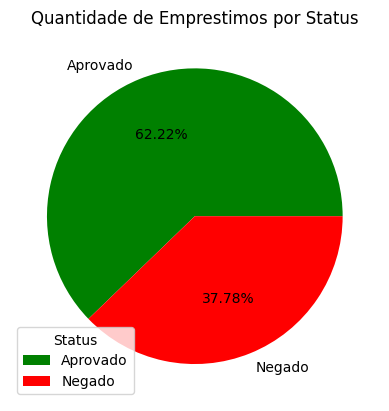

In [347]:
fig, ax = plt.subplots()

df_aux = df.groupby('StatusDoEmprestimo')['IdDoEmprestimo'].count()

plot = ax.pie(
    df_aux,
    autopct='%1.2f%%',
    labels = {'Aprovado':'Approved', 'Negado':'Rejected'},
    colors = {'green':'Approved', 'red':'Rejected'}
)

ax.set_title('Quantidade de Emprestimos por Status')
ax.legend(title='Status')

plt.show()

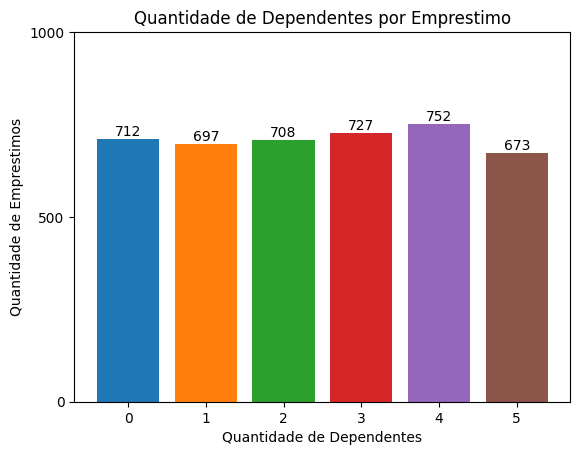

In [348]:
fig, ax = plt.subplots()

df_aux = df.groupby('QtdDependentes')['IdDoEmprestimo'].count().reset_index()

cmap = plt.cm.tab10
colors = cmap(np.arange(len(df_aux)) % cmap.N)

plot = ax.bar(
    df_aux['QtdDependentes'],
    df_aux['IdDoEmprestimo'],
    color=colors
)

ax.set_ylabel('Quantidade de Emprestimos')
ax.set_xlabel('Quantidade de Dependentes')
ax.set_title('Quantidade de Dependentes por Emprestimo')
ax.set_yticks([0,500,1000])
ax.bar_label(plot, label_type='edge')

plt.show()

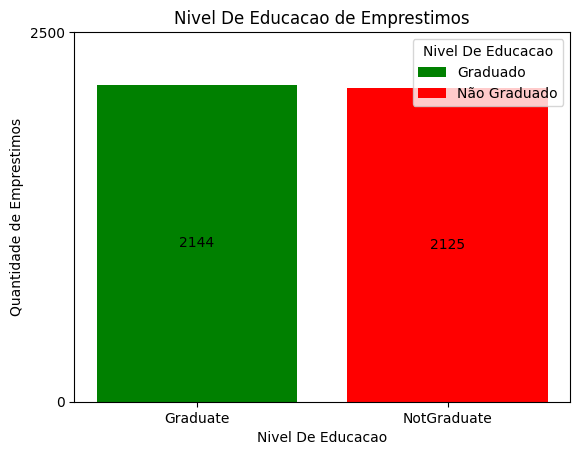

In [349]:
fig, ax = plt.subplots()

df_aux = df.groupby('NivelDeEducacao')['IdDoEmprestimo'].count().reset_index()

plot = ax.bar(
    df_aux['NivelDeEducacao'],
    df_aux['IdDoEmprestimo'],
    label = ['Graduado', 'Não Graduado'],
    color = {'green':'Graduate', 'red':'NotGraduate'}
)

ax.set_yticks([0,2500])
ax.set_ylabel('Quantidade de Emprestimos')
ax.set_xlabel('Nivel De Educacao')
ax.set_title('Nivel De Educacao de Emprestimos')
ax.legend(title='Nivel De Educacao')
ax.bar_label(plot, label_type='center')

plt.show()

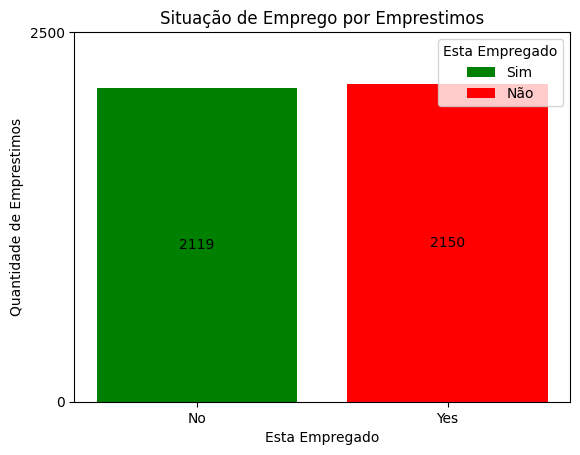

In [350]:
fig, ax = plt.subplots()

df_aux = df.groupby('EstaEmpregado')['IdDoEmprestimo'].count().reset_index()

plot = ax.bar(
    df_aux['EstaEmpregado'],
    df_aux['IdDoEmprestimo'],
    label = ['Sim', 'Não'],
    color = {'green':'Yes', 'red':'No'}
)

ax.set_yticks([0,2500])
ax.set_ylabel('Quantidade de Emprestimos')
ax.set_xlabel('Esta Empregado')
ax.set_title('Situação de Emprego por Emprestimos')
ax.legend(title='Esta Empregado')
ax.bar_label(plot, label_type='center')

plt.show()

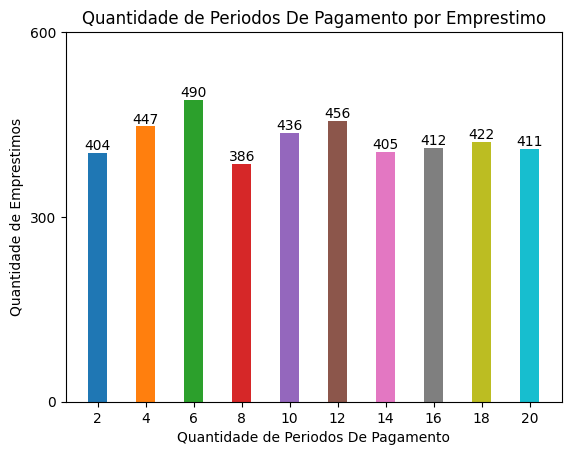

In [351]:
fig, ax = plt.subplots()

df_aux = df.groupby('PeriodoDePagamento')['IdDoEmprestimo'].count().reset_index()

cmap = plt.cm.tab10
colors = cmap(np.arange(len(df_aux)) % cmap.N)

plot = ax.bar(
    df_aux['PeriodoDePagamento'].astype('int'),
    df_aux['IdDoEmprestimo'],
    color=colors
)

ax.set_ylabel('Quantidade de Emprestimos')
ax.set_xlabel('Quantidade de Periodos De Pagamento')
ax.set_title('Quantidade de Periodos De Pagamento por Emprestimo')
ax.set_yticks([0,300,600])
ax.set_xticks(df_aux['PeriodoDePagamento'].unique())
ax.bar_label(plot, label_type='edge')

plt.show()

# REMOÇÃO DE OUTLIERS

In [352]:
df[['RendaAnual', 'ValorDoEmprestimo', 'ScoreCivil', 'ValorPossesImobiliarias', 'ValorPossesComerciais', 'ValorPossesLuxuosas', 'ValorPossesFinanceiras']].describe()

,RendaAnual,ValorDoEmprestimo,ScoreCivil,ValorPossesImobiliarias,ValorPossesComerciais,ValorPossesLuxuosas,ValorPossesFinanceiras
count,4.269000e+03,4.269000e+03,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,5.059124e+06,1.513345e+07,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,2.806840e+06,9.043363e+06,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,2.000000e+05,3.000000e+05,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,2.700000e+06,7.700000e+06,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,5.100000e+06,1.450000e+07,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,7.500000e+06,2.150000e+07,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,9.900000e+06,3.950000e+07,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


Através do boxplot abaixo é possível notar que existem outliers nas colunas: ValorPossesImobiliarias, ValorPossesComerciais e ValorPossesFinanceiras

<Axes: >

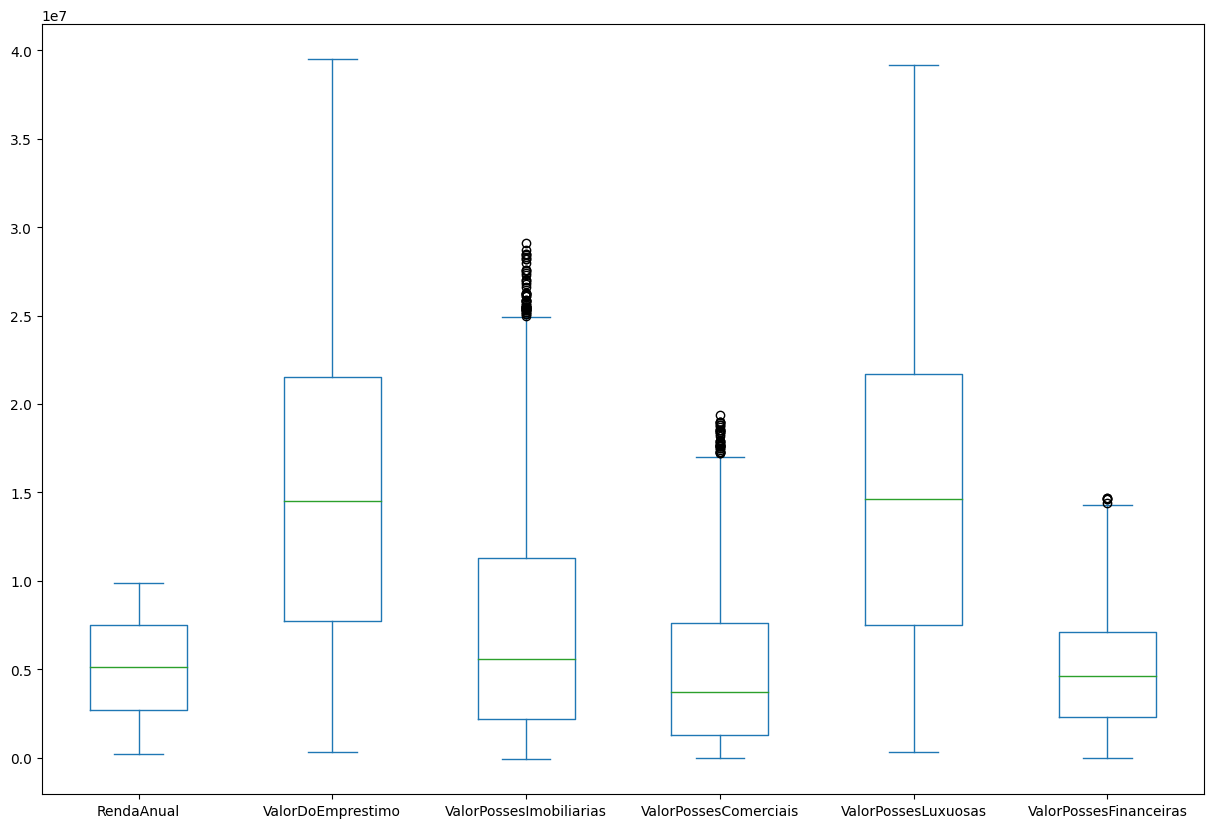

In [353]:
df[['RendaAnual', 'ValorDoEmprestimo', 'ValorPossesImobiliarias', 'ValorPossesComerciais', 'ValorPossesLuxuosas', 'ValorPossesFinanceiras']].plot(kind='box', figsize=(15,10))

Vamos realizar um scatter plot de cada uma delas para ter uma visao mais específica

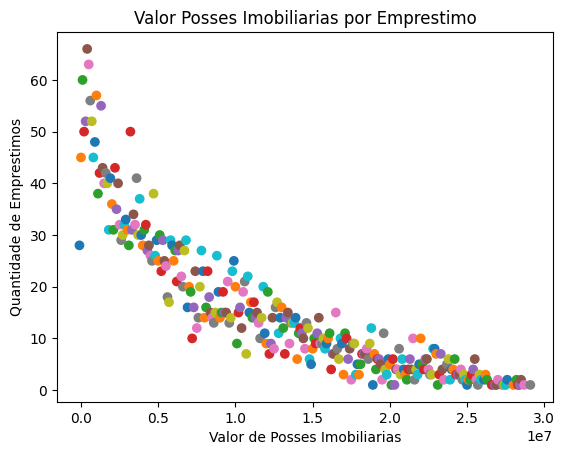

In [354]:
fig, ax = plt.subplots()

df_aux = df.groupby(['ValorPossesImobiliarias'])['IdDoEmprestimo'].count().reset_index()

cmap = plt.cm.tab10
colors = cmap(np.arange(len(df_aux)) % cmap.N)

plot = ax.scatter(
    df_aux['ValorPossesImobiliarias'],
    df_aux['IdDoEmprestimo'],
    color=colors
)

ax.set_ylabel('Quantidade de Emprestimos')
ax.set_xlabel('Valor de Posses Imobiliarias')
ax.set_title('Valor Posses Imobiliarias por Emprestimo')

plt.show()


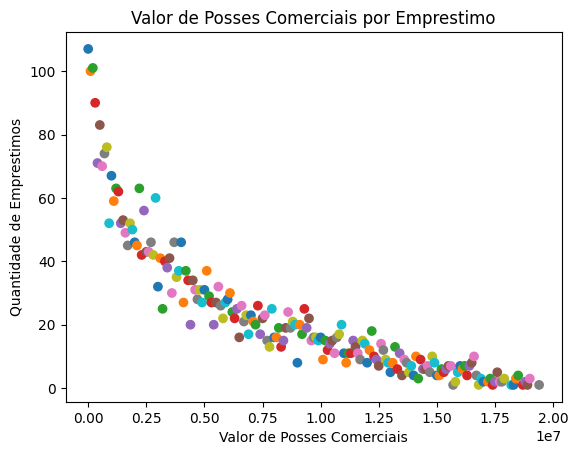

In [355]:
fig, ax = plt.subplots()

df_aux = df.groupby(['ValorPossesComerciais'])['IdDoEmprestimo'].count().reset_index()

cmap = plt.cm.tab10
colors = cmap(np.arange(len(df_aux)) % cmap.N)

plot = ax.scatter(
    df_aux['ValorPossesComerciais'],
    df_aux['IdDoEmprestimo'],
    color=colors
)

ax.set_ylabel('Quantidade de Emprestimos')
ax.set_xlabel('Valor de Posses Comerciais')
ax.set_title('Valor de Posses Comerciais por Emprestimo')

plt.show()


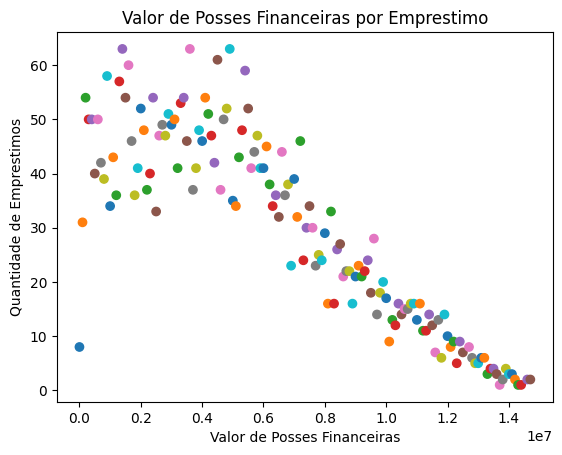

In [356]:
fig, ax = plt.subplots()

df_aux = df.groupby(['ValorPossesFinanceiras'])['IdDoEmprestimo'].count().reset_index()

cmap = plt.cm.tab10
colors = cmap(np.arange(len(df_aux)) % cmap.N)

plot = ax.scatter(
    df_aux['ValorPossesFinanceiras'],
    df_aux['IdDoEmprestimo'],
    color=colors
)

ax.set_ylabel('Quantidade de Emprestimos')
ax.set_xlabel('Valor de Posses Financeiras')
ax.set_title('Valor de Posses Financeiras por Emprestimo')

plt.show()


Iremos entao remover esse outliers utilizando a análise da variação interquartil para garantir uma boa base de treino para o modelo

In [357]:
shape_antes = df.shape

quartil_menor = df['ValorPossesImobiliarias'].quantile(0.25)
quartil_maior = df['ValorPossesImobiliarias'].quantile(0.75)

iqr = quartil_maior - quartil_menor
menor = quartil_menor - 1.5 * iqr
maior = quartil_maior + 1.5 * iqr

idx_menor = np.where(df['ValorPossesImobiliarias'] <= menor)[0]
idx_maior = np.where(df['ValorPossesImobiliarias'] >= maior)[0]
 
df.drop(index=idx_maior, inplace=True)
df.drop(index=idx_menor, inplace=True)
 
shape_depois = df.shape

print("Diferença de tamanho do Dataset após a remoção dos Outliers da colunas 'ValorPossesImobiliarias':")
print(f"Antes:", shape_antes, "| Depois:", shape_depois)

df.reset_index(inplace=True)
df.drop(columns='index', inplace=True)

Diferença de tamanho do Dataset após a remoção dos Outliers da colunas 'ValorPossesImobiliarias':
Antes: (4269, 13) | Depois: (4217, 13)


In [358]:
shape_antes = df.shape

quartil_menor = df['ValorPossesComerciais'].quantile(0.25)
quartil_maior = df['ValorPossesComerciais'].quantile(0.75)

iqr = quartil_maior - quartil_menor
menor = quartil_menor - 1.5 * iqr
maior = quartil_maior + 1.5 * iqr

idx_menor = np.where(df['ValorPossesComerciais'] <= menor)[0]
idx_maior = np.where(df['ValorPossesComerciais'] >= maior)[0]
 
df.drop(index=idx_maior, inplace=True)
df.drop(index=idx_menor, inplace=True)
 
shape_depois = df.shape

print("Diferença de tamanho do Dataset após a remoção dos Outliers da colunas 'ValorPossesComerciais':")
print(f"Antes:", shape_antes, "| Depois:", shape_depois)

df.reset_index(inplace=True)
df.drop(columns='index', inplace=True)

Diferença de tamanho do Dataset após a remoção dos Outliers da colunas 'ValorPossesComerciais':
Antes: (4217, 13) | Depois: (4182, 13)


In [359]:
shape_antes = df.shape

quartil_menor = df['ValorPossesFinanceiras'].quantile(0.25)
quartil_maior = df['ValorPossesFinanceiras'].quantile(0.75)

iqr = quartil_maior - quartil_menor
menor = quartil_menor - 1.5 * iqr
maior = quartil_maior + 1.5 * iqr

idx_menor = np.where(df['ValorPossesFinanceiras'] <= menor)[0]
idx_maior = np.where(df['ValorPossesFinanceiras'] >= maior)[0]
 
df.drop(index=idx_maior, inplace=True)
df.drop(index=idx_menor, inplace=True)
 
shape_depois = df.shape

print("Diferença de tamanho do Dataset após a remoção dos Outliers da colunas 'ValorPossesFinanceiras':")
print(f"Antes:", shape_antes, "| Depois:", shape_depois)

df.reset_index(inplace=True)
df.drop(columns='index', inplace=True)

Diferença de tamanho do Dataset após a remoção dos Outliers da colunas 'ValorPossesFinanceiras':
Antes: (4182, 13) | Depois: (4173, 13)


Observando os novos boxplots após a remoção dos outliers

<Axes: >

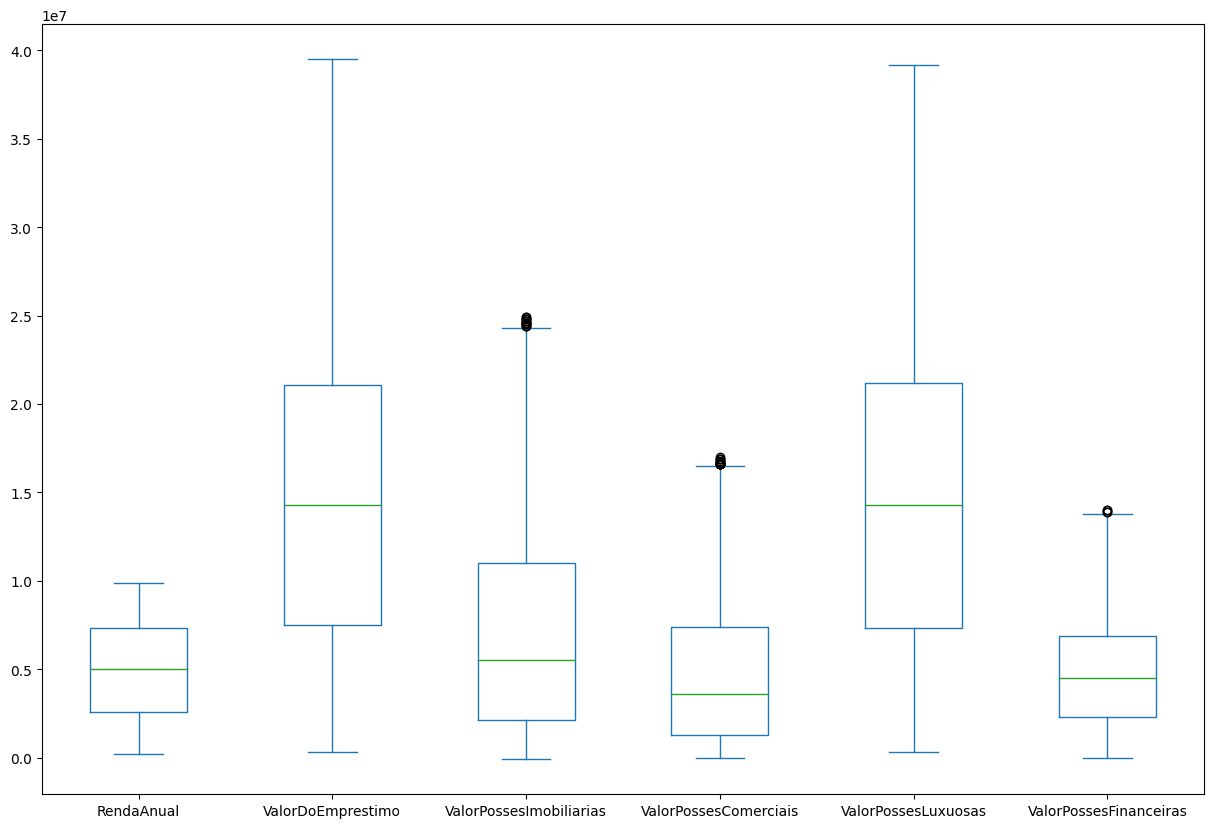

In [360]:
df[['RendaAnual', 'ValorDoEmprestimo', 'ValorPossesImobiliarias', 'ValorPossesComerciais', 'ValorPossesLuxuosas', 'ValorPossesFinanceiras']].plot(kind='box', figsize=(15,10))

# Correlação de variáveis

Outra etapa da exploração de dedaos será avaliar a correlação de variáveis para ver se temos alguma informação redundante ou irrelevante, no entanto, antes é necessário converter as variáveis categóricas para numéricas 

In [361]:
df['NivelDeEducacao'] = df['NivelDeEducacao'].transform(lambda x: 0 if x == 'NotGraduate' else 1)
df['EstaEmpregado'] = df['EstaEmpregado'].transform(lambda x: 0 if x == 'No' else 1)
df['StatusDoEmprestimo'] = df['StatusDoEmprestimo'].transform(lambda x: 0 if x == 'Rejected' else 1)   

In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4173 entries, 0 to 4172
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   IdDoEmprestimo           4173 non-null   int64
 1   QtdDependentes           4173 non-null   int64
 2   NivelDeEducacao          4173 non-null   int64
 3   EstaEmpregado            4173 non-null   int64
 4   RendaAnual               4173 non-null   int64
 5   ValorDoEmprestimo        4173 non-null   int64
 6   PeriodoDePagamento       4173 non-null   int64
 7   ScoreCivil               4173 non-null   int64
 8   ValorPossesImobiliarias  4173 non-null   int64
 9   ValorPossesComerciais    4173 non-null   int64
 10  ValorPossesLuxuosas      4173 non-null   int64
 11  ValorPossesFinanceiras   4173 non-null   int64
 12  StatusDoEmprestimo       4173 non-null   int64
dtypes: int64(13)
memory usage: 423.9 KB


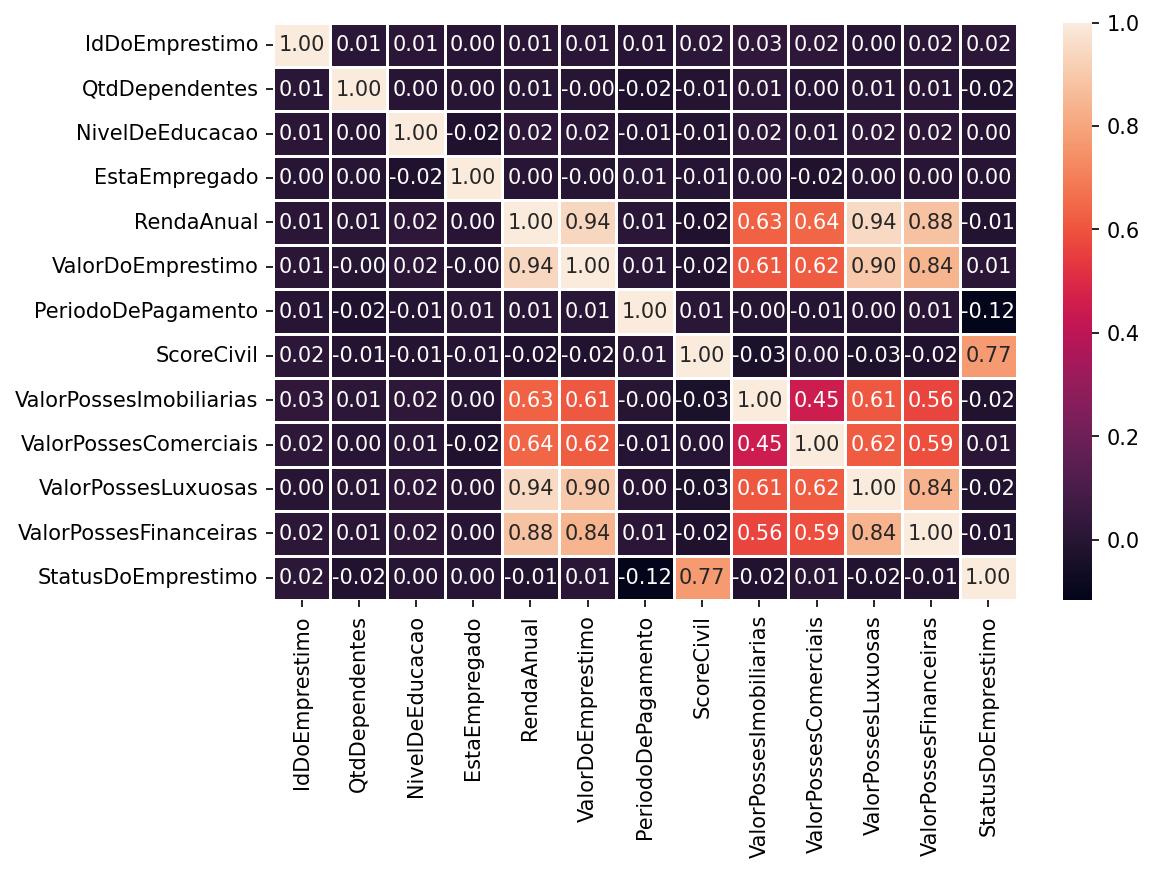

In [363]:
plt.figure(figsize=(8,5), dpi =150)
sns.heatmap(df.corr(method='spearman'),annot=True,fmt=".2f", linewidth=.5)
plt.show()

# Normalização

Por fim, vamos normalizar as váriaveis numéricas analisadas anteriormente para melhor qualidade do modelo e remover a coluna IdDoEmprestimo pois sabemos que é apenas um valor de indexação 

In [364]:
df.drop(columns='IdDoEmprestimo', inplace=True)

scaler = StandardScaler()

df['QtdDependentes'] = scaler.fit_transform(df[['QtdDependentes']])
df['PeriodoDePagamento'] = scaler.fit_transform(df[['PeriodoDePagamento']])
df['ScoreCivil'] = scaler.fit_transform(df[['ScoreCivil']])
df['RendaAnual'] = scaler.fit_transform(df[['RendaAnual']])
df['ValorDoEmprestimo'] = scaler.fit_transform(df[['ValorDoEmprestimo']])
df['ValorPossesImobiliarias'] = scaler.fit_transform(df[['ValorPossesImobiliarias']])
df['ValorPossesComerciais'] = scaler.fit_transform(df[['ValorPossesComerciais']])
df['ValorPossesLuxuosas'] = scaler.fit_transform(df[['ValorPossesLuxuosas']])
df['ValorPossesFinanceiras'] = scaler.fit_transform(df[['ValorPossesFinanceiras']])

In [365]:
display(df.head(5))

,QtdDependentes,NivelDeEducacao,EstaEmpregado,RendaAnual,ValorDoEmprestimo,PeriodoDePagamento,ScoreCivil,ValorPossesImobiliarias,ValorPossesComerciais,ValorPossesLuxuosas,ValorPossesFinanceiras,StatusDoEmprestimo
0,-1.475464,0,1,-0.311364,-0.297962,-0.505247,-1.063084,-0.730512,-0.622704,-0.673448,-0.493590,0
1,0.295178,1,0,1.501660,1.663530,1.597541,-0.546621,-0.013423,-0.075652,2.053095,2.505374,0
2,0.295178,1,0,1.175316,1.775615,-0.505247,-0.772936,1.795598,-0.361070,0.940220,0.958540,0
3,1.475605,0,1,1.755483,1.047061,1.597541,-1.266187,0.850344,0.804387,1.619074,0.043067,0
4,-1.475464,1,1,-0.057541,-0.152251,-0.154782,-1.631773,-0.062316,0.828172,-0.128139,0.074635,0


# Salvando o Dataset tratado

In [366]:
df.to_csv(r'C:\Users\guilh\Desktop\Projects\MineracaoDeDados\Projeto\main\data\processed\loan_approval_dataset.csv')